## Why Seaborn?

Because in ML we'll often care about:

- Feature relationships (pairplot, heatmap)
- Class distribution (countplot)
- Correlation checks (heatmap)
- Cleaner versions of scatter, bar, hist (with less code than Matplotlib)

So, Seaborn is basically your EDA (exploratory data analysis) power tool.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Example Dataset :---
# Basically seaborn comes with a collection of prebuilt datasets that are specifically designed for practice and learning data visualization and analysis techniques
# To see the full list of available datasets, we can use the get_dataset_names() function, which returns a list of dataset names.
# The complete list includes datasets such as 'tips', 'iris', 'penguins', 'flights', 'diamonds', 'titanic', 'mpg', 'planets', 'car_crashes', 'anscombe', 'fmri', 'geyser', 'exercise', 'healthexp', 'dots', 'dowjones', 'brain_networks', 'anagrams', 'attention', 'glue', 'seaice', 'taxis', and 'gammas'.
# These datasets can be loaded directly into a Python environment using the load_dataset() function from the Seaborn library

# df = sns.load_dataset('tips')

# or we can download .csv file of any dataset , then ;
df = pd.read_csv('tips.csv')

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 1. Setup & Styles

style options → "white", "dark", "whitegrid", "darkgrid", "ticks"

In [4]:
sns.set_theme(style="whitegrid") # clean style (common in ML)

## 2. Distribution Plots

### (a) Histogram → sns.histplot()

**Purpose**: Check feature distribution.

**Arguments**:

- data → column/array
- bins → number of bars
- kde=True → adds smooth density curve
- color

<Axes: xlabel='total_bill', ylabel='Count'>

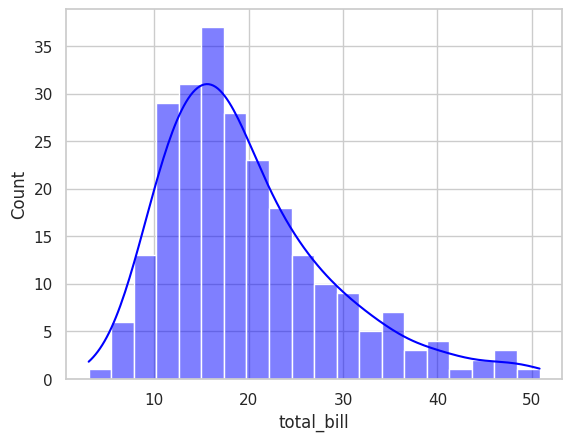

In [5]:
sns.histplot(df['total_bill'], bins=20, kde=True, color="blue")

### (b) KDE Plot → sns.kdeplot()

**Purpose**: Smooth density estimate (alternative to hist).

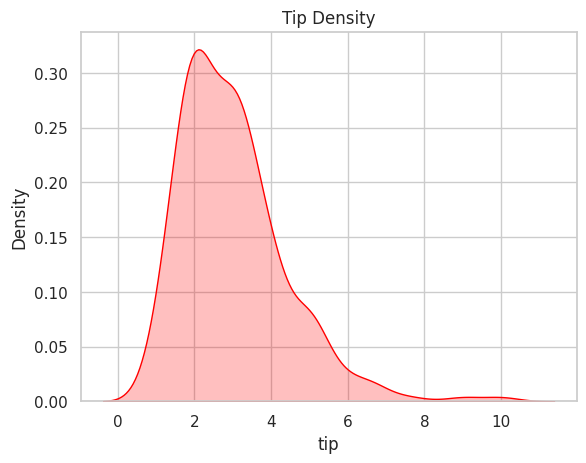

In [6]:
sns.kdeplot(df['tip'], fill=True, color="red")
plt.title("Tip Density")
plt.show()

### (c) Box Plot → sns.boxplot()

**Purpose**: Detect outliers.


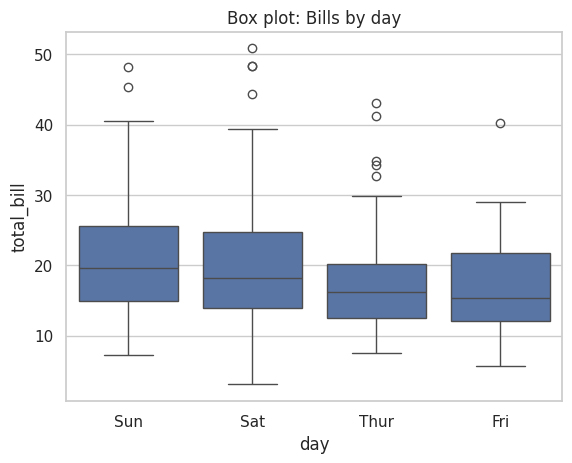

In [ ]:
sns.boxplot(x="day", y="total_bill", data=df)
plt.title("Box plot: Bills by day")
plt.show()

'''
Arguments:

x, y → categorical vs numeric
data → DataFrame
'''

### (d) Violin Plot → sns.violinplot()

**Purpose**: Box plot + density.

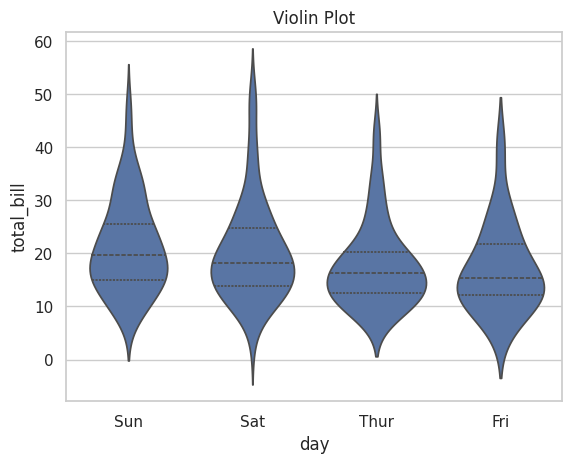

In [10]:
sns.violinplot(x="day",y="total_bill", data=df, inner="quartile")
plt.title("Violin Plot")
plt.show()

## 3. Categorical Plots

### (a) Count Plot → sns.countplot()

**Purpose**: Frequency of categories.

/tmp/ipykernel_305204/3776028865.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="day", data=df, palette="pastel")


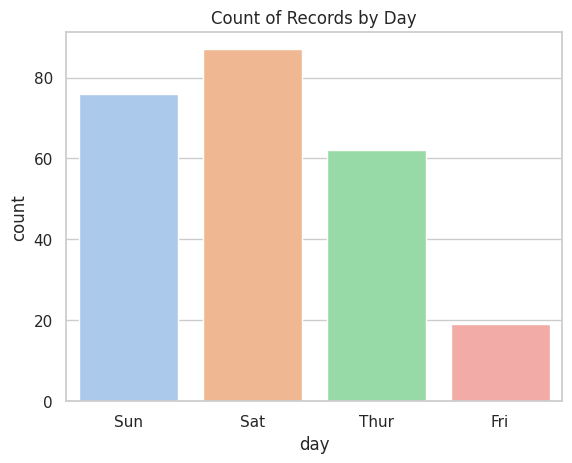

In [11]:
sns.countplot(x="day", data=df, palette="pastel")
plt.title("Count of Records by Day")
plt.show()

### (b) Bar Plot → sns.barplot()

**Purpose**: Compare mean values across categories.

/tmp/ipykernel_305204/1116551300.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="day",y="tip", data=df, ci=None, palette="muted")
/tmp/ipykernel_305204/1116551300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day",y="tip", data=df, ci=None, palette="muted")


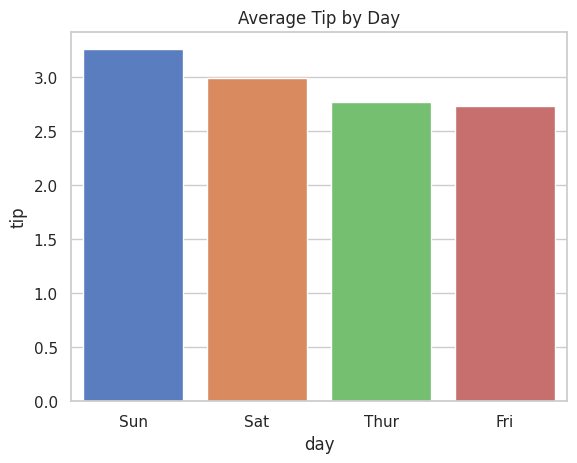

In [ ]:
sns.barplot(x="day",y="tip", data=df, ci=None, palette="muted")
plt.title("Average Tip by Day")
plt.show()

''' 
Args:

ci=None → removes confidence intervals (for clarity)
palette → color scheme
'''

## 4. Relationship Plots

### (a) Scatter Plot → sns.scatterplot()

**Purpose**: Relationship between 2 features.

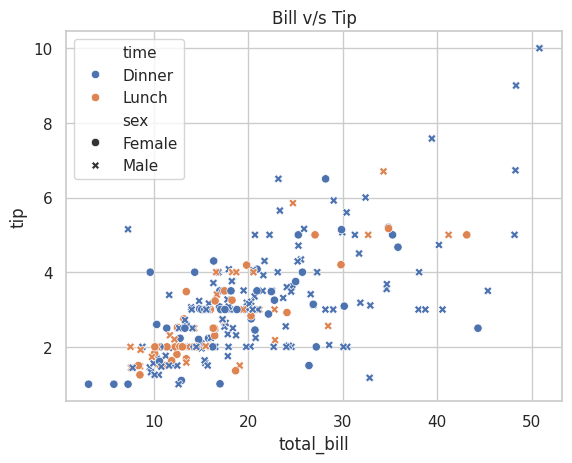

In [ ]:
sns.scatterplot(x="total_bill", y="tip", data=df, hue="time", style="sex")
plt.title("Bill v/s Tip")
plt.show()

''' 
Args:

hue → color by category
style → marker style by category
size → size by numeric col
'''

### (b) Line Plot → sns.lineplot()

**Purpose**: Trends (loss curves, time-series).

/tmp/ipykernel_305204/4078121032.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="size", y="tip", data=df, ci=None)


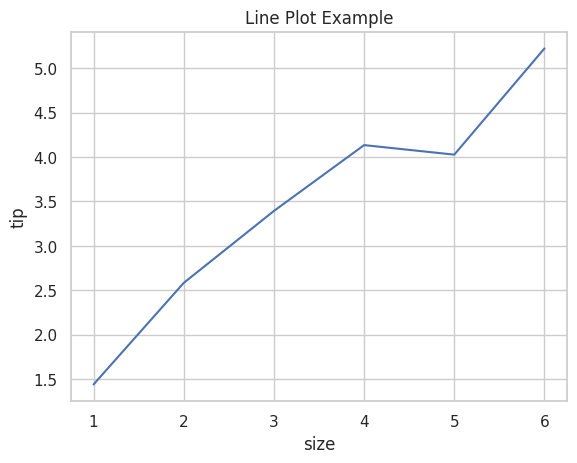

In [18]:
sns.lineplot(x="size", y="tip", data=df, ci=None)
plt.title("Line Plot Example")
plt.show()

### (c) Pair Plot → sns.pairplot()

**Purpose**: Pairwise scatter plots (great for ML feature inspection).

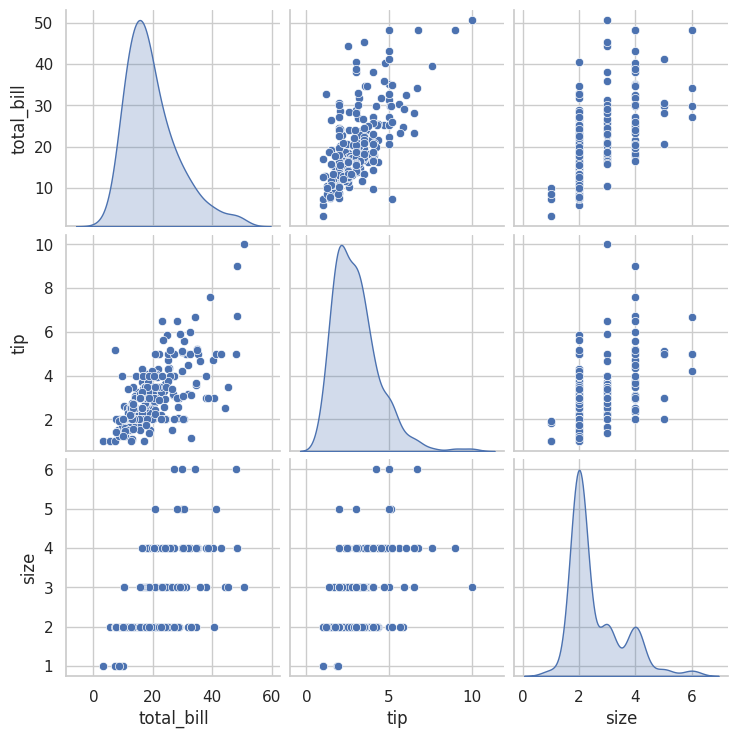

In [ ]:
sns.pairplot(df[["total_bill", "tip", "size"]], diag_kind="kde")
plt.show()

''' 
Args:

diag_kind="kde" → KDE on diagonal
hue → color by category
'''

### 5. Correlation Heatmap → sns.heatmap()

**Purpose**: Check correlation matrix (super important in ML).

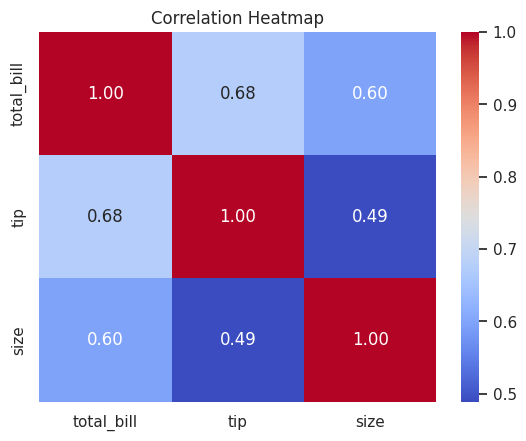

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

'''
Args:

annot=True → show numbers
cmap → color map ("coolwarm", "viridis")
fmt=".2f" → format decimals
'''

### 6. Multi-Plots with FacetGrid

**Purpose**: Split plots by category automatically.

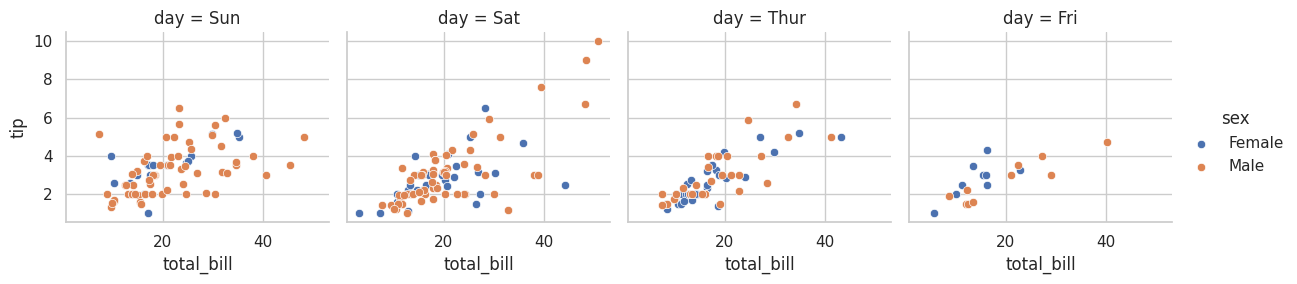

In [22]:
g = sns.FacetGrid(df, col="day", hue="sex")
g.map(sns.scatterplot, "total_bill", "tip")
g.add_legend()
plt.show()

In [8]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
